# Нормализация базы данных: от 1НФ до 3НФ
## Исходные таблицы

База состоит из двух таблиц:

- transaction — 20 000 записей о транзакциях:  
  transaction_id, product_id, customer_id, transaction_date, online_order, order_status, brand, product_line, product_class, product_size, list_price, standard_cost.

- customer — 4 000 записей о клиентах:  
  customer_id, first_name, last_name, gender, DOB, job_title, job_industry_category, wealth_segment, deceased_indicator, owns_car, address, postcode, country, property_valuation.

## Почему изначально не в 3НФ?

- Таблица transaction нарушает 2НФ - существует частичная зависимость атрибутов продукта (brand, list_price и др.) от составного ключа. Эти поля зависят не от всего ключа транзакции, а только от характеристик товара.

- Таблица customer нарушает 3НФ - присутствует транзитивная зависимость: postcode → country, state, где неключевой атрибут зависит от другого неключевого атрибута.

## 1НФ — Первая нормальная форма

Обе таблицы уже находятся в 1НФ, так как:
- Все значения атомарны.
- Нет повторяющихся групп.
- Есть первичные ключи: transaction_id и customer_id.

> Ничего не меняем.


## 2НФ — Вторая нормальная форма

Таблица transaction не в 2НФ, потому что:
- Первичный ключ — transaction_id.
- Поля brand, product_line, product_class, product_size, list_price, standard_cost зависят не от транзакции, а от характеристик продукта — это частичная зависимость.
### Решение:
Выносим данные о продукте в отдельную таблицу product_variants

variant_id - суррогатный ключ который зависит от product_id, brand, product_line, product_class, product_size.

| Поле | Описание |
|------|--------|
| variant_id (PK) | Суррогатный ключ |
| product_id | Оригинальный ID продукта |
| brand | Бренд |
| product_line | Линейка |
| product_class | Класс |
| product_size | Размер |
| list_price | Фиксированная цена |
| standard_cost | Фиксированная себестоимость |
list_price и standard_cost полностью зависят от `variant_id` — цена не меняется по транзакциям.

Таблица transaction упрощается до:
- transaction_id (PK)
- variant_id (FK → `product_variants`)
- customer_id (FK → `customer`)
- transaction_date, online_order, order_status

> Теперь все неключевые поля зависят только от `transaction_id` → 2НФ достигнута.


## 3НФ — Третья нормальная форма

Таблица customer не в 3НФ из-за транзитивной зависимости:
→ country, state зависит не от customer_id, а от postcode

### Решение:
Создаём таблицу location:

| Поле | Описание |
|------|--------|
| postcode (PK) | Почтовый индекс |
| state | Штат/регион |
| country | Страна |

Таблица customer обновляется:
- Убираем country
- Оставляем postcode как внешний ключ на location.postcode

> Теперь нет транзитивных зависимостей → 3НФ достигнута.


## Итоговая структура (3НФ)
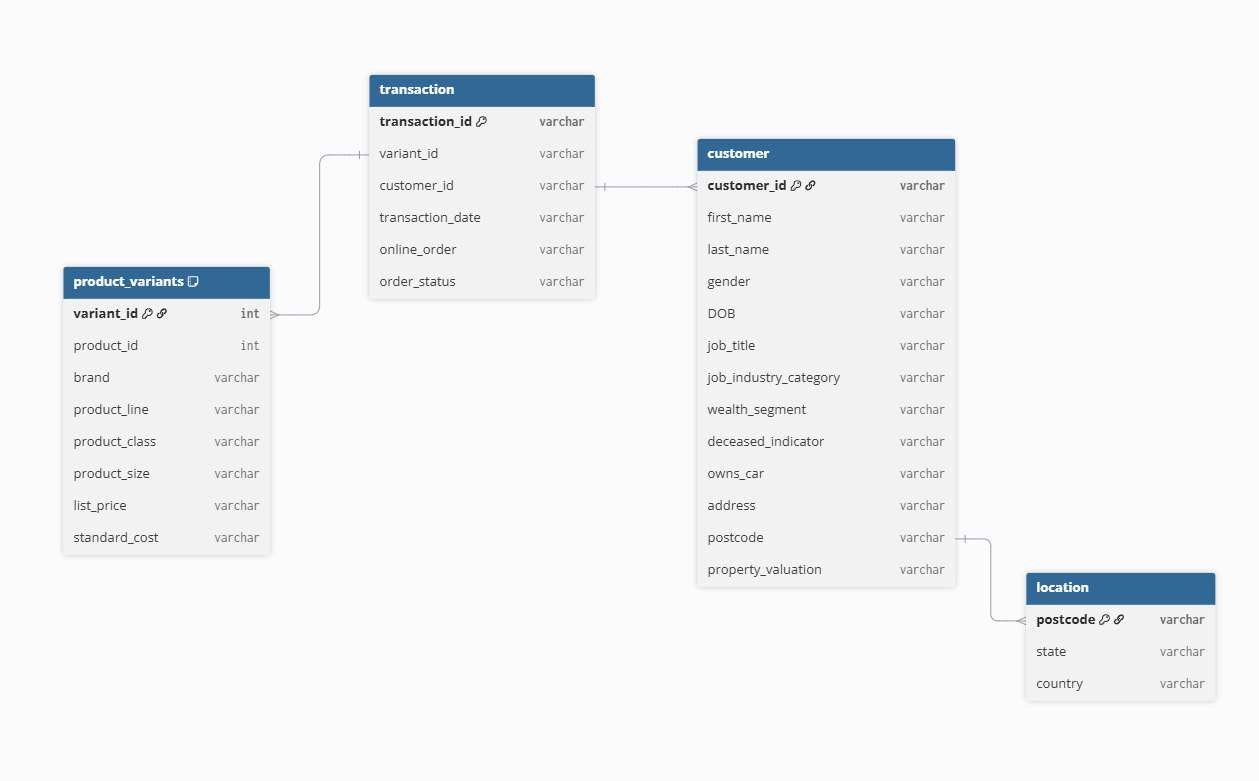